In [3]:
from scipy import stats
import seaborn as sns
import pandas as pd
import numpy as np
import yfinance as yf
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from scipy.stats import skew
pd.options.mode.chained_assignment = None  # default='warn'
import datetime

In [4]:
from datetime import datetime, timedelta 
datetime(2022,3,1) - datetime(2020,3,2)

datetime.timedelta(days=729)

In [80]:
snp_500=pd.read_csv("SNP_500.csv")
EFFR=pd.read_csv("EFFR.csv")
print(snp_500.columns.values, EFFR.columns.values)

EFFR.columns=['Date',
 'Rate_Type',
 'Rate',
 '1st_Percentile(%)',
 '25th_Percentile(%)',
 '75th_Percentile(%)',
 '99th_Percentile(%)',
 'Volume($Billions)',
 'Target_Rate_From(%)',
 'Target_Rate_To(%)',
 'Intra_Day_Low (%)',
 'Intra_Day_High (%)',
 'SD(%)',
 '30-Day_Average_SOFR',
 '90-Day_Average_SOFR',
 '180-Day_Average_SOFR',
 'SOFR_Index',
 'Revision_Indicator(Y/N)',
 'Footnote_ID']

start_date="2012-03-01"
end_date="2022-03-01"
EFFR.Date=pd.to_datetime(EFFR.Date)
EFFR=EFFR.sort_values("Date").reset_index(drop=True)
snp_500.Date=pd.to_datetime(snp_500.Date)

EFFR=EFFR[(EFFR.Date >=start_date) & (EFFR.Date<=end_date)]
snp_500=snp_500[(snp_500.Date>=start_date) & (snp_500.Date<=end_date)]
EFFR=EFFR[EFFR.Date.isin(snp_500.Date)].reset_index(drop=True)
snp_500=snp_500.reset_index(drop=True)
snp_500=snp_500[(snp_500.Date.isin(EFFR.Date))].reset_index(drop=True)


EFFR["Rate_change"]=EFFR.Rate.pct_change()

['Date' 'Open' 'High' 'Low' 'Close' 'Adj_Close' 'Volume' 'returns'
 'Log_returns'] ['Effective Date' 'Rate Type' 'Rate (%)' '1st Percentile (%)'
 '25th Percentile (%)' '75th Percentile (%)' '99th Percentile (%)'
 'Volume ($Billions)' 'Target Rate From (%)' 'Target Rate To (%)'
 'Intra Day - Low (%)' 'Intra Day - High (%)' 'Standard Deviation (%)'
 '30-Day Average SOFR' '90-Day Average SOFR' '180-Day Average SOFR'
 'SOFR Index' 'Revision Indicator (Y/N)' 'Footnote ID']


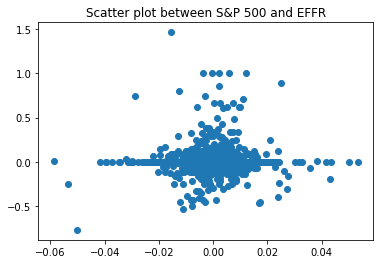

In [81]:
plt.scatter(snp_500["Log_returns"], EFFR["Rate_change"])
plt.title("Scatter plot between S&P 500 and EFFR")
plt.savefig("Scatter_EFFR_snp", bbox_inches='tight')

In [ ]:
plt.scatter(snp_500["Log_returns"], EFFR["Rate_change"])
plt.title("Scatter plot between S&P 500 and EFFR")
plt.savefig("Scatter_EFFR_snp", bbox_inches='tight')

0.021212765452052994


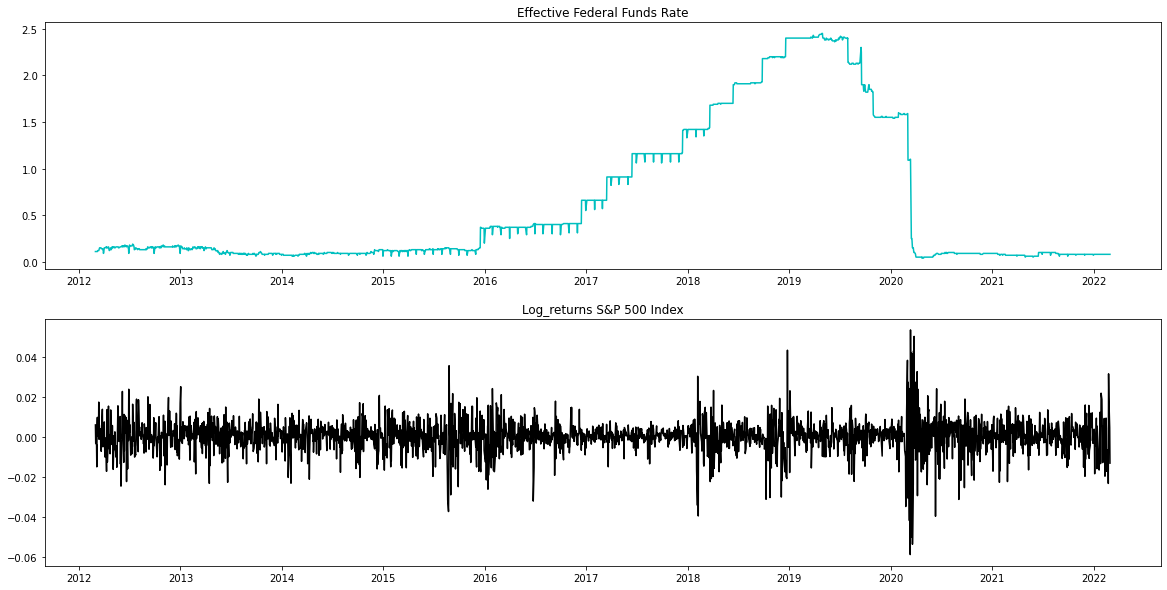

In [82]:
fig, ax=plt.subplots(2,1, figsize=(20,10))
axes=ax.flatten()
axes[0].set_title("Effective Federal Funds Rate")
axes[0].plot(EFFR.Date, EFFR.Rate, 'c')

axes[1].set_title("Log_returns S&P 500 Index")
axes[1].plot(snp_500.Date, snp_500.Log_returns, 'k')
print(snp_500["Log_returns"].corr(EFFR["Rate_change"]))

fig.savefig("EFFR_SNP_500_Comp_10yr.png", bbox_inches='tight')

In [71]:
def stock_monte_carlo(start_price, days, mu, sigma, dt):  
    price = np.zeros(days)
    price[0] = start_price
  
      # shock and drift
    shock = np.zeros(days)
    drift = np.zeros(days)
  
      # run price array for number of days
    for x in range(1, days):
        drift_delta = mu * dt
        # calculate shock
        shock[x] = np.random.normal(loc=drift_delta, scale=sigma * np.sqrt(dt))
    
        # calculate drift
        drift[x] = drift_delta
    
        # calculate price
        price[x] = price[x-1] + (price[x-1] * (drift[x] + shock[x]))
    
    return price

class analysis ():
    
    def __init__(self):
        self.stock_data = pd.DataFrame()
        self.market_data = pd.DataFrame()
        self.ticker = str
        self.start = "2020-03-01"
        self.end = "2022-03-01"
        self.stock = pd.DataFrame()
        

        self.ema=list
        
            
    def data_extract(self,ticker=str):
        self.ticker=ticker
        stock = yf.download(ticker, 
                      start='2012-01-01', 
                      end='2022-03-28', 
                      progress=False)
        stock.columns=['Open','High','Low','Close','Adj_Close', 'Volume']
        #stock["returns"]=((stock["Close"]-stock["Open"])/stock["Close"])
        stock["returns"]=stock["Adj_Close"].pct_change()
        stock['Log_returns'] = np.log(stock["Adj_Close"]/stock["Open"])
        stock=stock.dropna()
        stock.to_csv(ticker+".csv")
        self.stock_data=stock
        self.stock = self.stock_data[self.start:self.end]
        self.Log_returns=self.stock["Log_returns"]
        self.volume=self.stock.Volume

        
                
        market = stock = yf.download("^GSPC", 
                    start='2012-01-01', 
                    end='2022-03-28', 
                    progress=False)
        market.columns=['Open','High','Low','Close','Adj_Close', 'Volume']
        market["returns"]=((market["Adj_Close"]-market["Open"])/market["Adj_Close"])
        market['Log_returns'] = np.log(market["Adj_Close"]/market["Open"])
        market.to_csv("snp_500.csv")
        self.market_data=market
        
        
        if self.ticker == "GOOG":
            self.color='b'
        elif self.ticker =="AAPL":
            self.color='r'
        elif self.ticker =="AMZN":
            self.color='m'
        elif self.ticker =="MSFT":
            self.color='g'
        else: 
            self.color="k"

        return self.stock_data
    


    
    def visualize(self):
        
        
        # show open and close to see the trend and volatility
        fig = plt.figure()
        ax = fig.add_axes([0.1,0.1,2,0.8])
        ax.grid(False)
        ax.set_title("Open & Adj Close Price ({})".format(self.ticker))
        ax.plot(self.stock.Adj_Close, label="Adj_Close")
        ax.plot(self.stock.Open, label="Open")
        ax.legend()
        plt.savefig("Open_Adj_close_" +str(self.ticker)+".png", bbox_inches='tight')
        
        # This technical indicator is used to produce buy and sell 
        # signals based on crossovers and divergences from the historical average. 
        # 5-exponential moving average: smoothing is a weight indicator to the newer data, 
        # the higher the smoothing,
        # the greater weight and significance on the most recent data points.
        
        days=5
        smoothing=2
        prices = self.stock.Adj_Close
        
        if smoothing==None:
            smoothing=(2/(days+1))
    
        date_list = self.stock.Open.index
    
        ema = [sum(prices[:days]) / days]
        
        for price in prices[days:]:
            ema.append((price * (smoothing / (1 + days))) + ema[-1] * (1 - (smoothing / (1 + days))))
        
        self.ema = ema
        
        # Show the ema trend and close price 
        fig = plt.figure()
        ax = fig.add_axes([0.1,0.1,2,0.8])
        ax.set_title("5-EMA trend({})".format(self.ticker))
        ax.grid(False)
        ax.plot(date_list[:len(self.ema)], self.ema, label="EMA")
        ax.plot(date_list, self.stock.Adj_Close.reset_index(drop=True), label="Adj_Close")
        ax.set_xlabel("days")
        ax.legend()
        plt.savefig("ema_" +str(self.ticker)+".png", bbox_inches='tight')
        
        days2=10
        ema2 = [sum(prices[:days2]) / days2]
    
        for price in prices[days2:]:
            ema2.append((price * (smoothing / (1 + days2))) + ema2[-1] * (1 - (smoothing / (1 + days2))))
        self.ema2 = ema2
        # only ema
        fig = plt.figure()
        ax = fig.add_axes([0.1,0.1,2,0.8])
        ax.set_title("10-EMA trend({})".format(self.ticker))
        ax.grid(False)
        ax.plot(date_list[9:], self.ema2, label="EMA", color=self.color)
        ax.set_xlabel("days")
        #ax.set_xlim(right = datetime.strptime('2022-04-08', '%Y-%m-%d'))
        ax.legend()
        plt.savefig("10ema_only" +str(self.ticker)+".png", bbox_inches='tight')
        
        
        
        # only 5-ema
        fig = plt.figure()
        ax = fig.add_axes([0.1,0.1,2,0.8])
        ax.set_title("5-EMA trend({})".format(self.ticker))
        ax.grid(False)
        ax.plot(date_list[4:], self.ema, label="EMA",color=self.color)
        ax.set_xlabel("days")
        #ax.set_xlim(right = datetime.strptime('2022-04-08', '%Y-%m-%d'))
        ax.legend()
        plt.savefig("5ema_only" +str(self.ticker)+".png", bbox_inches='tight')
        
        
        
        # show the volume
        fig = plt.figure()
        ax = fig.add_axes([0.1,0.1,2,0.8])
        ax.grid(False)
        ax.set_title("Volume ({})". format(str(self.ticker)))
        ax.set_ylabel("Volume")
        ax.plot(self.stock.Volume, self.color)
        plt.savefig("Volume_" +str(self.ticker)+".png", bbox_inches='tight')
        print("Average volume: {}".format(sum(self.volume)/len(self.volume)))
        
        # Plot Return 
        fig = plt.figure()
        ax = fig.add_axes([0.1,0.1,2,0.8])
        ax.grid(False)
        ax.plot(self.stock.returns, self.color)
        ax.set_title("Return ({})".format(str(self.ticker)))
        ax.set_ylabel("Return")
        ax.set_xlabel("Date")
        plt.savefig("Returns_" +str(self.ticker)+".png", bbox_inches='tight')
        
        
        
        # Show the log return
        # Log return is a good indicator when compare with other stock
        fig = plt.figure()
        ax = fig.add_axes([0.1,0.1,2,0.8])
        ax.grid(False)
        ax.plot(self.stock.Log_returns, self.color)
        ax.set_title("Log Return ({})".format(str(self.ticker)))
        ax.set_ylabel("Log Return")
        ax.set_xlabel("Date")
        plt.savefig("Log_returns_" +str(self.ticker)+".png", bbox_inches='tight')
    


        #Show the cum returns
        # the last element of the cum_returns is the profit from the start to period till the end
        self.stock["cum_returns"] = ((self.stock["returns"]+ 1).cumprod()) -1
        
        #Plot cum return        
        fig = plt.figure()
        ax = fig.add_axes([0.1,0.1,2,0.8])
        ax.grid(False)
        ax.plot(self.stock.cum_returns*100, self.color)
        ax.set_title("cumulative returns ({})".format(str(self.ticker)))
        ax.set_ylabel("Cumulative returns (%)")
        ax.set_xlabel("Date")
        plt.savefig("Cum_returns_" +str(self.ticker)+".png", bbox_inches='tight')
        
        # Average Monthly return
                
        self.stock['Date']=self.stock.index
        self.stock['mdate']=self.stock["Date"].dt.to_period("M")
        self.stock["ret_1"]=self.stock["Log_returns"]+1
        group=self.stock.groupby(["mdate"])
        self.stock["m_ret"]=group["ret_1"].transform(np.product)-1

        mret_df=pd.DataFrame(group["m_ret"].describe())
        fig = plt.figure()
        ax = fig.add_axes([0.1,0.1,0.8,0.8])


        mret_df["mean"].plot.bar(width = 0.8, color=self.color)
                
        ax.set_title("Average Monthly Returns ({})".format(str(self.ticker)))
        ax.set_ylabel("Average Monthly Returns")
        ax.set_xlabel("Year-Month")
        plt.savefig("Average_monthly_ret" +str(self.ticker)+".png", bbox_inches='tight')
        
     
        # Beta: Measure the volatility of the stock
        # Stock with beta over 1 , mean swings more than the market (higher volatility than the market)
        # high beta :preferred by an investor in growth stocks 
        # but shunned by investors who seek steady returns and lower risk.
        
        # Alpha: how well (or badly) a stock has performed in comparison to a benchmark index.
        # A high alpha is always good.
        # alpha = -15 means the investment was far too risky given the return. 
        # alpha = 0: suggests that an asset has earned a return commensurate with the risk. 
        # Alpha >= 0 means an investment outperformed, after adjusting for volatility.
        # higher risk higher income
        
        stock=self.stock
        market=self.market_data
        
        stock["Date"]=stock.index
        market["Date"]=market.index
        market=market[market.Date.isin(stock.Date)]

        (beta, alpha) = stats.linregress(market.Log_returns.values
                                         ,stock.Log_returns.values)[0:2]
        self.beta=beta
        self.alpha=alpha
        
        print("The portfolio beta is", round(beta, 4))
        print("The portfolio alpha is", round(alpha,5))
        
    
        vol=self.stock['Log_returns'].std()*252**.5
        
        
        str_vol = str(round(vol, 4)*100)
        fig, ax = plt.subplots()
        self.stock["Log_returns"].hist(ax=ax, bins=50, alpha=0.6, color=self.color)
        ax.grid(False)
        ax.set_xlabel("Log return")
        ax.set_ylabel("Freq of log return")
        ax.set_title("Volatility ({}): {} %" .format(str(self.ticker),str_vol))
        plt.savefig("Volatility_" +str(self.ticker)+".png", bbox_inches='tight')
        self.volatility = str_vol
        
        #------------- monte carlo simulation         
        # Set up our time horizon
        start_price = self.stock.Adj_Close[0]
        monte_days = 730

        # Now our delta
        dt = 1.0/monte_days

        # Now let's grab our mu (drift) from the expected return data we got for GOOG
        mu = self.stock.Log_returns.mean()

        # Now let's grab the volatility of the stock from the std() of the average return
        sigma = self.stock.Log_returns.std()
        var = self.stock.Log_returns.var()
        # Next, we will create a function that takes in the starting price and 
        # number of days, and uses the σ and μ we already calculated from our 
        # daily returns
        # Set a large numebr of runs
        runs = 100000

        
        # Create an empty matrix to hold the end price data
        simulations = np.zeros(runs)
    
        for run in range(runs):    
            # Set the simulation data point as the last stock price for that run
            simulations[run] = stock_monte_carlo(start_price,monte_days,mu,sigma,dt)[monte_days-1]
        
        self.simulations=simulations
        q = np.percentile(simulations, 1)

        # Now let's plot the distribution of the end prices
        fig=plt.figure()
        
        ax1 = fig.add_axes([0.1,0.1,0.8,0.8])
        ax1.grid(False)
        ax1.hist(simulations, color = self.color, bins=20, alpha=0.7)
        ax1.set_title("Distribution of Monte-Carlo-simulaton ({})".format(str(self.ticker)))
        plt.savefig("Dist_MCS_" +str(self.ticker)+".png", bbox_inches='tight')
        
        
        print('Monte-Carlo Stimulation:'+'\n'+
                'Start Price: ${:.2f}'.format(start_price)+'\n'+
                'Mean Final Price: ${:.2f}'.format(simulations.mean())+'\n'+
                "VaR(0.99): ${:.2f}".format(start_price - q)+'\n'+
                "q(0.99): ${:.2f}".format(q))
        
        #So we have looked at the 1% empirical quantile of the final price distribution to 
        # estimate Value at Risk for the stock, which looks to be  ( VaR ) for every investment of (Start Price)
      
      

    

        
        

In [72]:
class mix ():
        
    def __init__(self):
        self.df=pd.DataFrame
        self.color=str

        self.var_5_quant=[]
        self.var_5_perc=[]
        
    def correlate(self):

        df=pd.DataFrame({"GOOG":GOOG.Log_returns,
                     "AAPL":AAPL.Log_returns, 
                     "AMZN":AMZN.Log_returns,
                     "MSFT":MSFT.Log_returns,
                     "SNP": SNP_500.Log_returns})
        self.df=df
        
        fig=plt.figure()
        ax = fig.add_axes([0.1,0.1,1,1])
        ax.set_title("Correlation Matrix of 4 stocks and S&P 500 index")
        self.corr=df.corr()
        mask = np.zeros_like(df.corr())
        mask[np.triu_indices_from(mask)] = True
        sns.heatmap(df.corr(), annot=True, mask=mask, square=True)
        
        plt.savefig("5_heatmap.png", bbox_inches='tight')
        
        date_list = GOOG.stock.Open.index
        base = datetime.strptime('2020-03-02', '%Y-%m-%d')
        date_list = [base + timedelta(days=x) for x in range(505)]
        
        fig=plt.figure()
        ax = fig.add_axes([0.1,0.1,2,1])
        ax.plot(date_list[4:], GOOG.ema, label="GOOG",color= "b")
        ax.plot(date_list[4:], AAPL.ema, label="APPL",color="r")
        ax.plot(date_list[4:], AMZN.ema, label="AMZN",color="m")
        ax.plot(date_list[4:], MSFT.ema, label="MSFT",color="g")
        ax.plot(date_list[4:], SNP_500.ema, label="SNP_500",color="k")
        ax.set_title("5-EMA of 4 Stocks")
        #ax.set_xlim(right = datetime.strptime('2022-04-08', '%Y-%m-%d'))
        ax.legend()
        plt.savefig("5_EMA_All.png", bbox_inches='tight')
        
                
        fig=plt.figure()
        ax = fig.add_axes([0.1,0.1,2,1])
        ax.boxplot(df)
        ax.set_title("Distribution of Stocks Log_Returns")
        ax.set_xticklabels(["GOOG","AAPL", "AMZN","MSFT","SNP"])
        plt.savefig("Distribution_Log_returns.png", bbox_inches='tight')
        
        
        for i in df.columns:
            if i == "GOOG":
                self.color='b'
            elif i =="AAPL":
                self.color='r'
            elif i =="AMZN":
                self.color='m'
            elif i =="MSFT":
                self.color='g'
            else: 
                self.color="k"   
                
            fig, ax = plt.subplots()
            sns.despine()
            sns.histplot(df[i].dropna(), color = self.color, kde=True)
            ax.set_title(str(i)+" Log return distribution")
            ax.set_ylabel("Log returns")
            plt.savefig(str(i)+"_Distribution_Log_returns.png", bbox_inches='tight')
        
        
        
        
        fig, axes = plt.subplots(2, 2,figsize=(20, 10))
        axes=axes.flatten()
        sns.histplot(df["GOOG"].dropna(), color = 'b', kde=True, ax=axes[0])
        sns.histplot(df["AAPL"].dropna(), color = 'r', kde=True, ax=axes[1])
        sns.histplot(df["AMZN"].dropna(), color = 'm', kde=True, ax=axes[2])
        sns.histplot(df["MSFT"].dropna(), color = 'g', kde=True, ax=axes[3])
        axes[0].set_title("GOOG Log Return Distribution")
        axes[0].set_xlabel("Log returns")
        axes[1].set_title("AAPL Log Return Distribution")
        axes[1].set_xlabel("Log returns")
        axes[2].set_title("AMZN Log Return Distribution")
        axes[2].set_xlabel("Log returns")
        axes[3].set_title("MSFT Log Return Distribution")
        axes[3].set_xlabel("Log returns")
        
        
        
        fig.savefig("Distribution_Log_returns.png", bbox_inches='tight')
        
        # 95% confidence
        # worst daily loss will not exceed var_5_percent
        # Let say if we invest 1,000,000 in each stock
        #The 0.05 empirical quantile of log returns
        
        for i in df.columns: 
            
            self.var_5_quant.append(round(df[i].quantile(0.05), 3))
            self.var_5_perc.append(abs(round(df[i].quantile(0.05), 3))*100)
        
        self.var_one_mil = [int(-k*1000000) for k in self.var_5_quant]
        self.var_5=pd.DataFrame({"var_5_quant":self.var_5_quant,"var_5_perc (%)":self.var_5_perc,
                                 "var_5_one_mil":self.var_one_mil},
                                index=df.columns)
        
        print(self.var_5)
    

Average volume: 119884849.10891089
The portfolio beta is 1.019
The portfolio alpha is -0.00591
Monte-Carlo Stimulation:
Start Price: $73.69
Mean Final Price: $72.85
VaR(0.99): $3.75
q(0.99): $69.94


array([73.0594817 , 73.21776412, 73.65806196, ..., 75.31999249,
       72.11533063, 72.94464186])

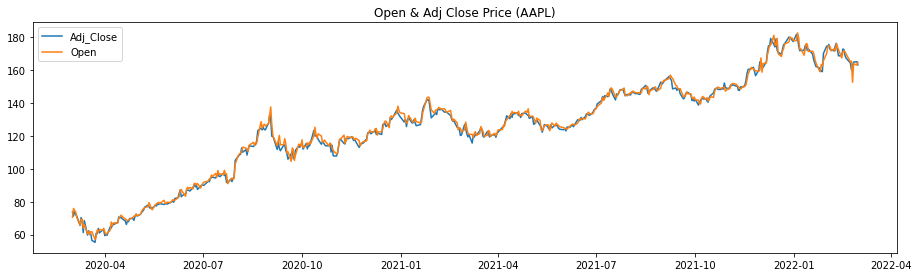

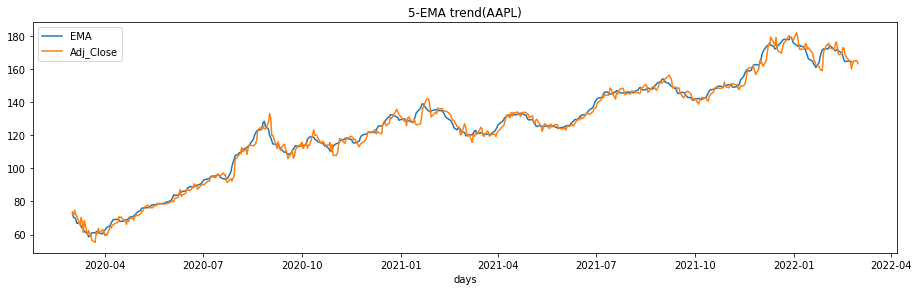

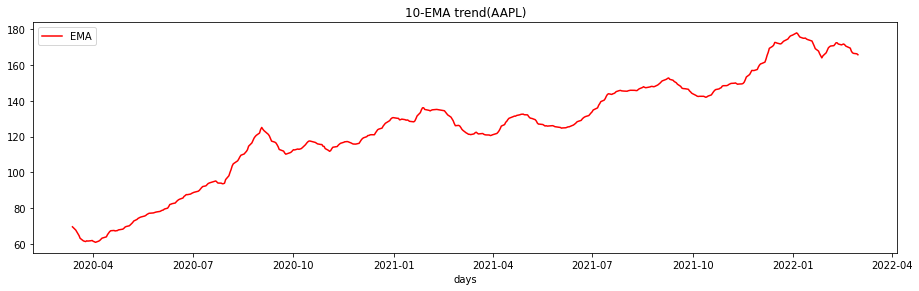

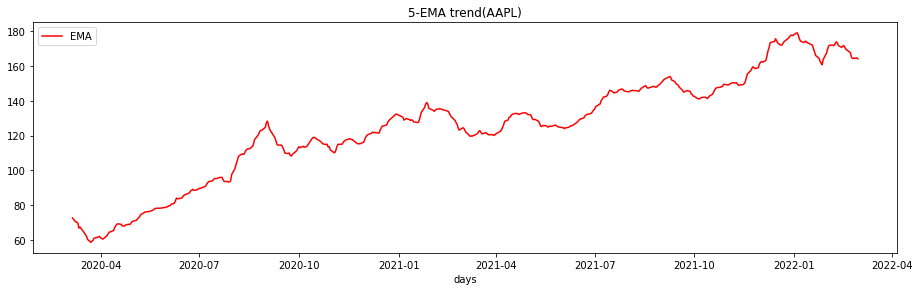

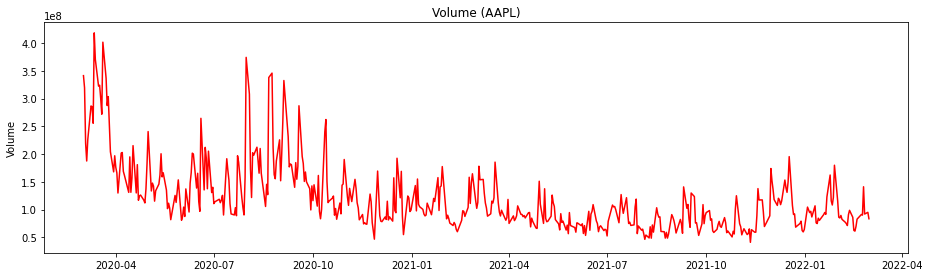

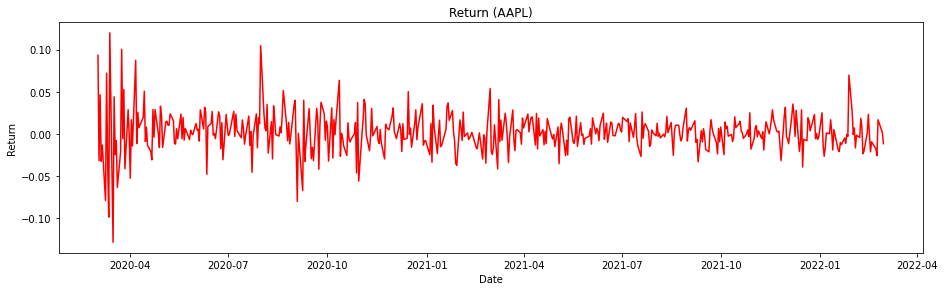

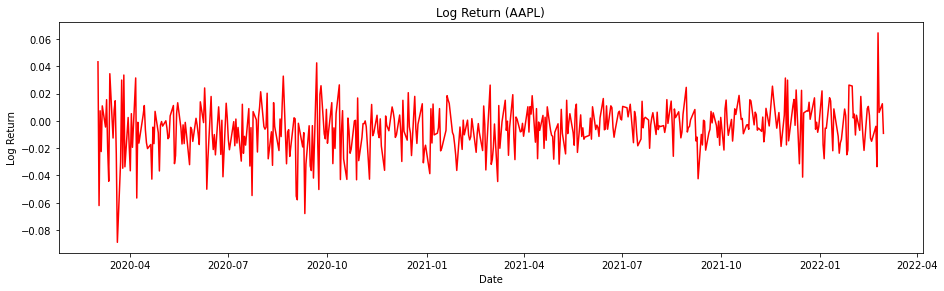

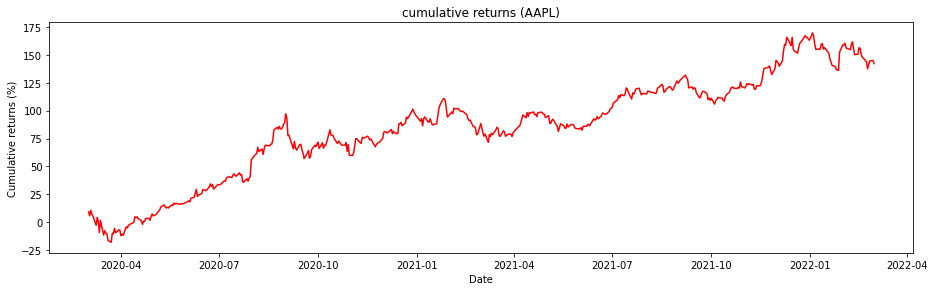

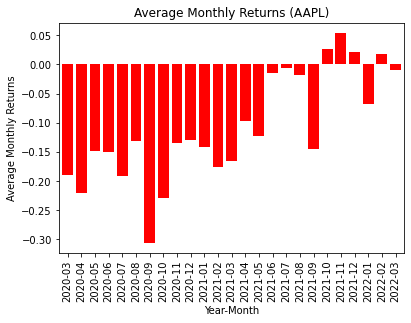

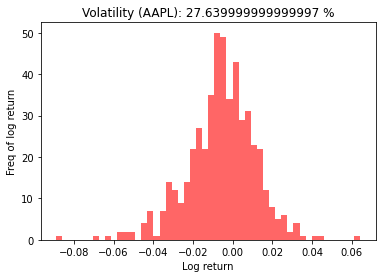

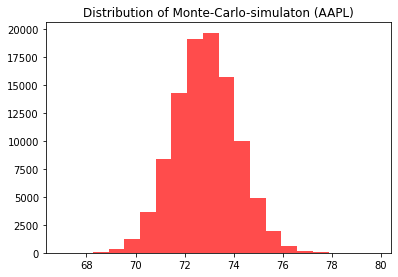

In [73]:
AAPL=analysis()
AAPL.data_extract("AAPL")
AAPL.visualize()
AAPL.simulations

Average volume: 1574349.504950495
The portfolio beta is 0.8927
The portfolio alpha is 0.00059
Monte-Carlo Stimulation:
Start Price: $1389.11
Mean Final Price: $1391.20
VaR(0.99): $45.27
q(0.99): $1343.84


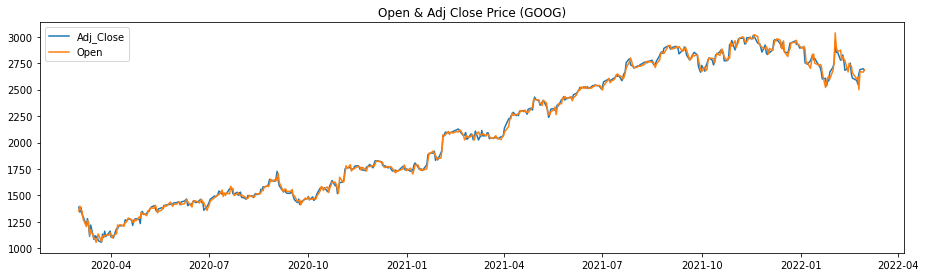

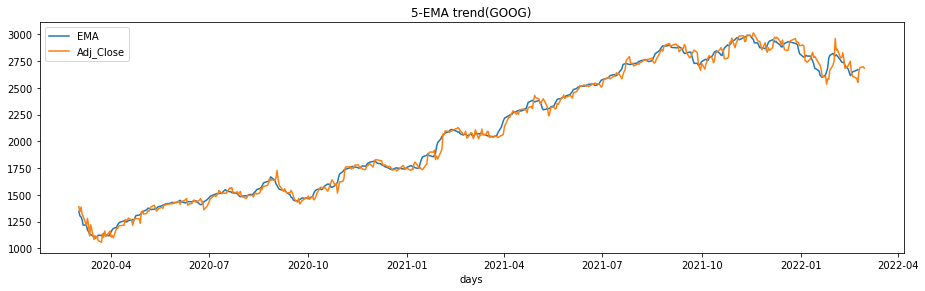

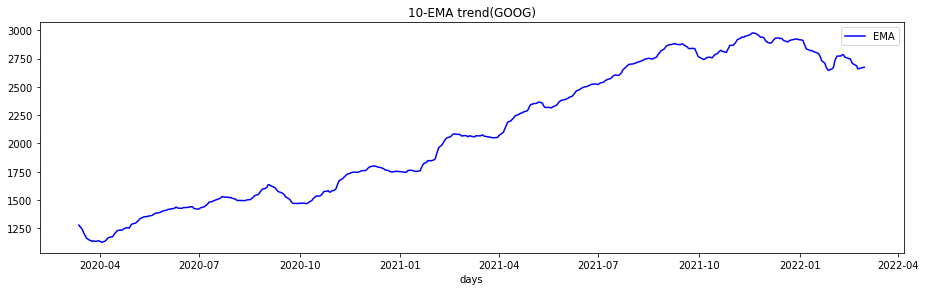

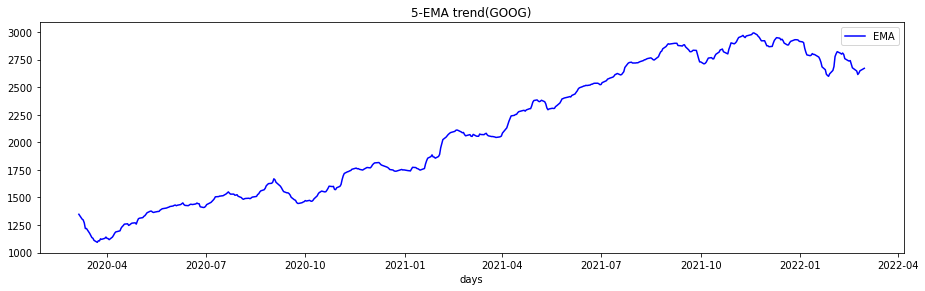

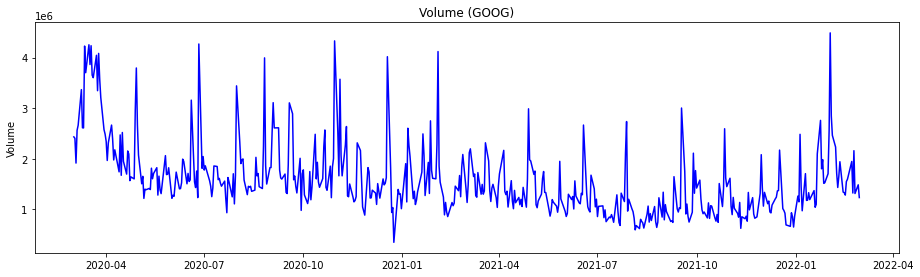

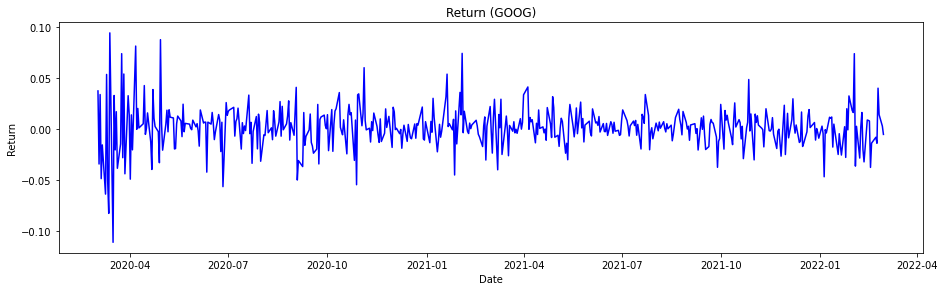

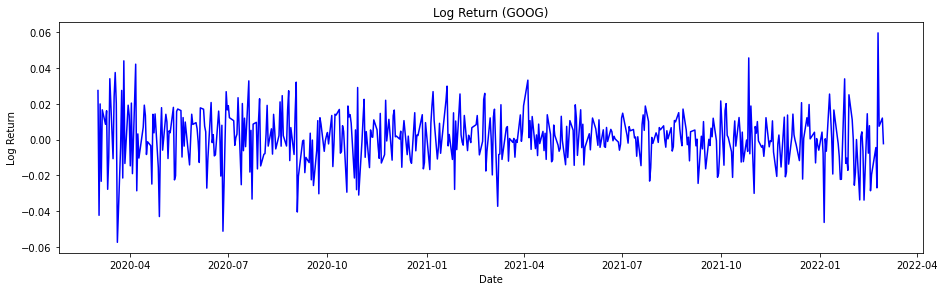

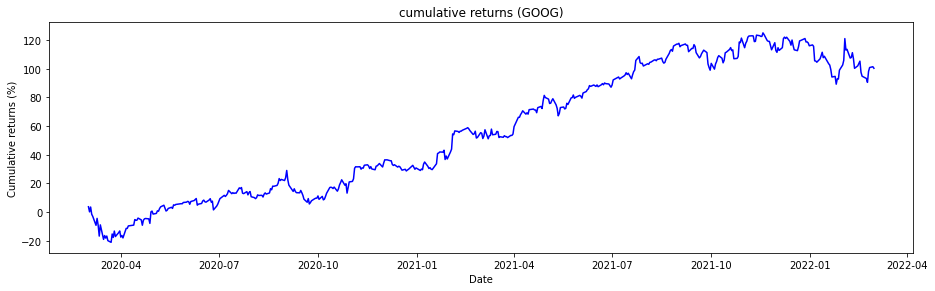

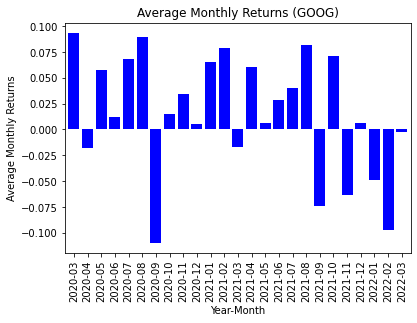

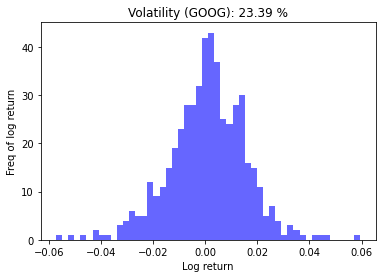

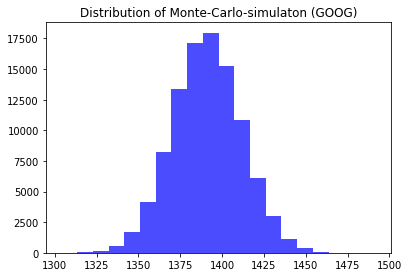

In [74]:
GOOG= analysis()
GOOG.data_extract("GOOG")
GOOG.visualize()

Average volume: 4132885.1485148515
The portfolio beta is 0.757
The portfolio alpha is -0.00039
Monte-Carlo Stimulation:
Start Price: $1953.95
Mean Final Price: $1952.99
VaR(0.99): $77.23
q(0.99): $1876.72


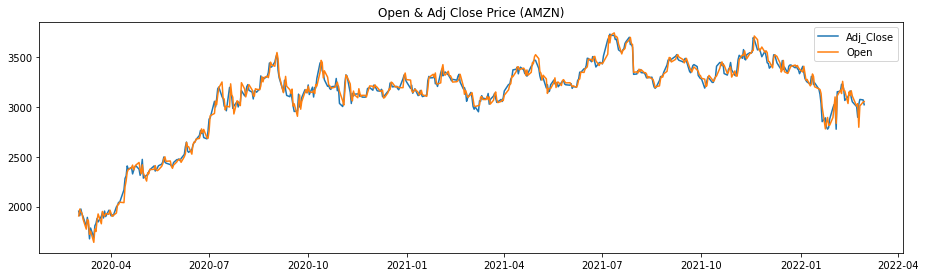

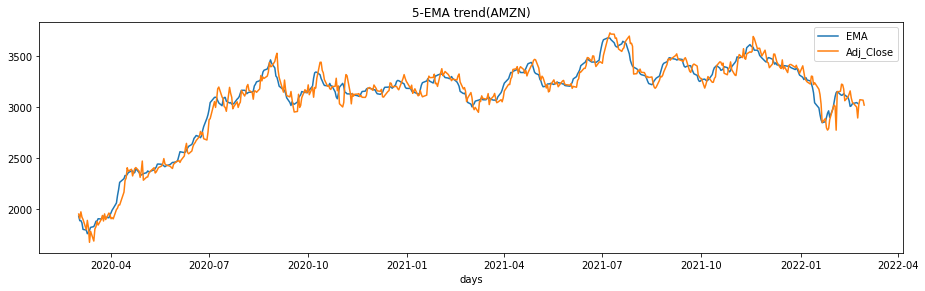

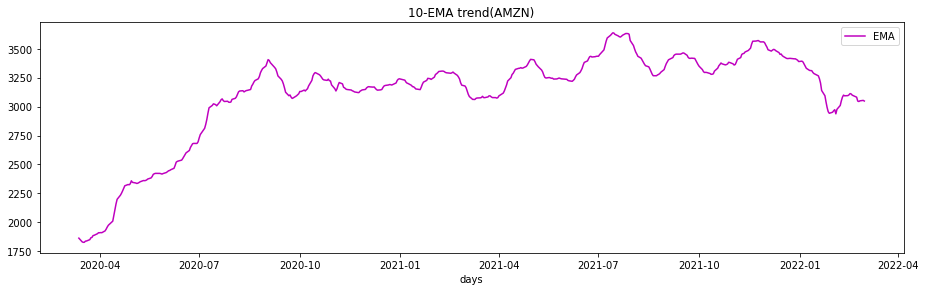

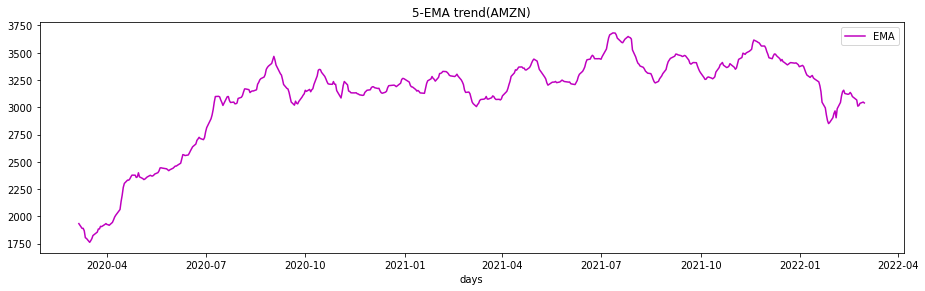

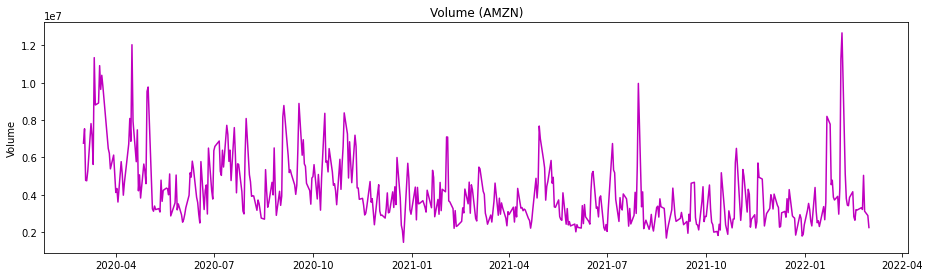

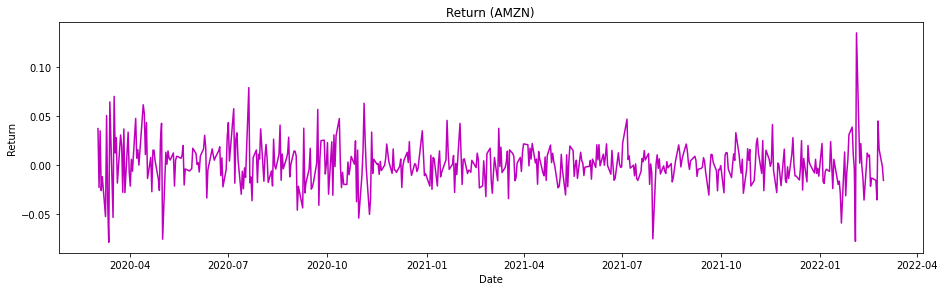

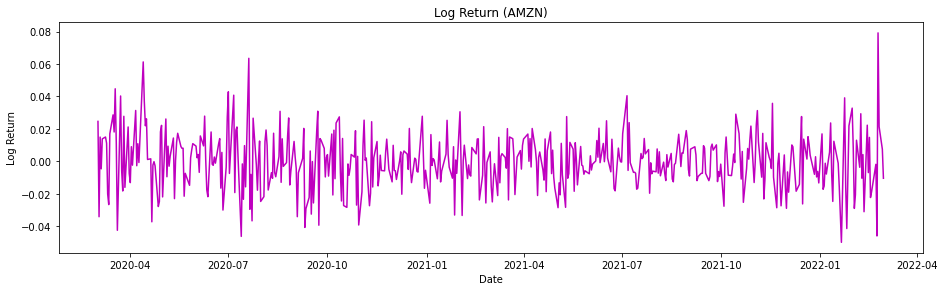

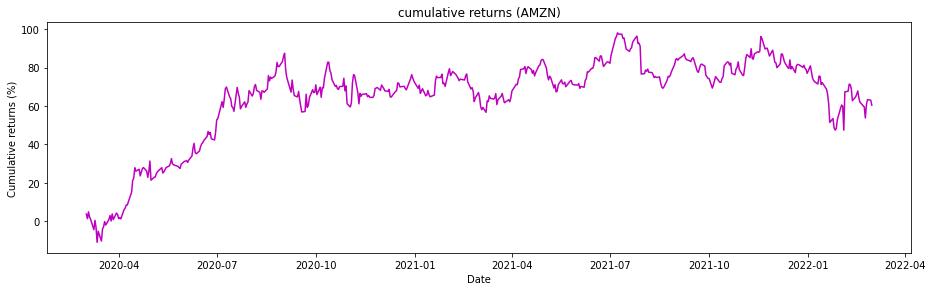

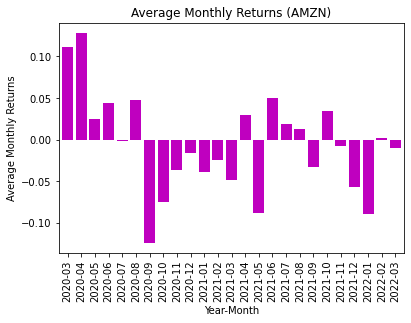

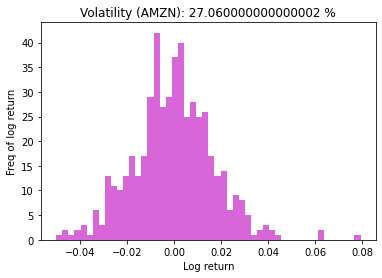

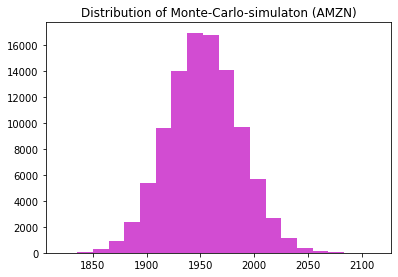

In [75]:
AMZN=analysis()
AMZN.data_extract("AMZN")
AMZN.visualize()

Average volume: 32302779.405940592
The portfolio beta is 1.0403
The portfolio alpha is -0.00901
Monte-Carlo Stimulation:
Start Price: $169.67
Mean Final Price: $166.71
VaR(0.99): $9.11
q(0.99): $160.56


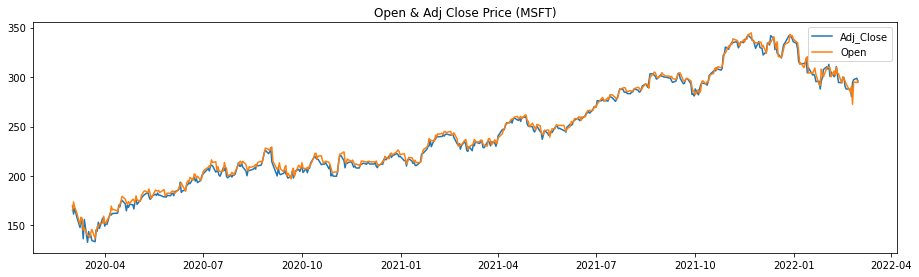

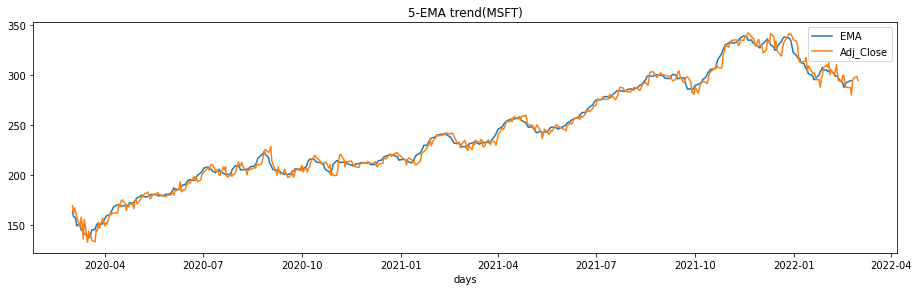

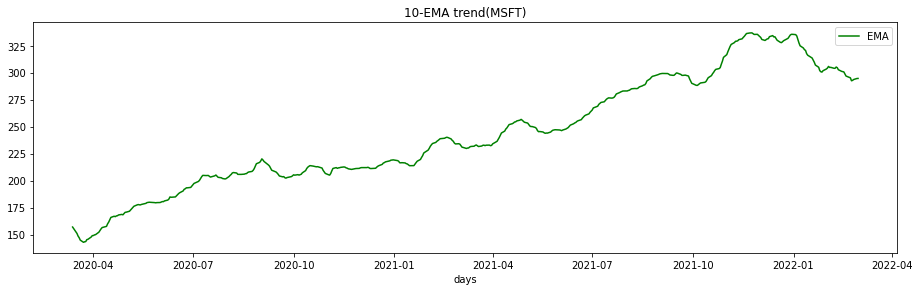

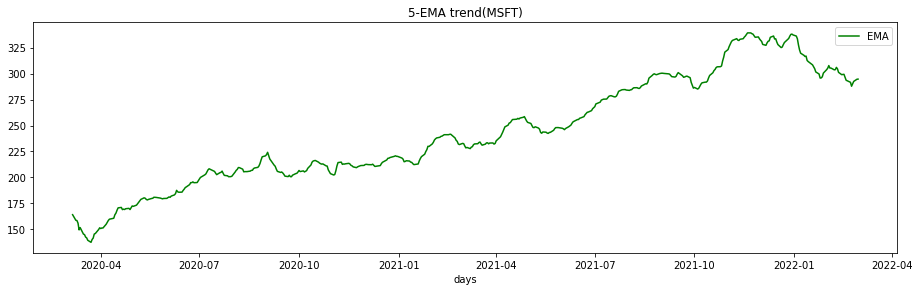

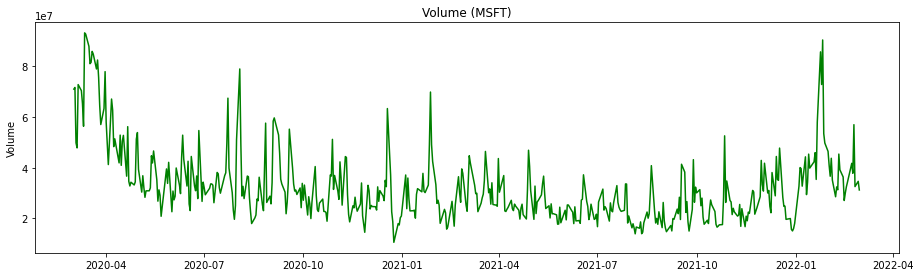

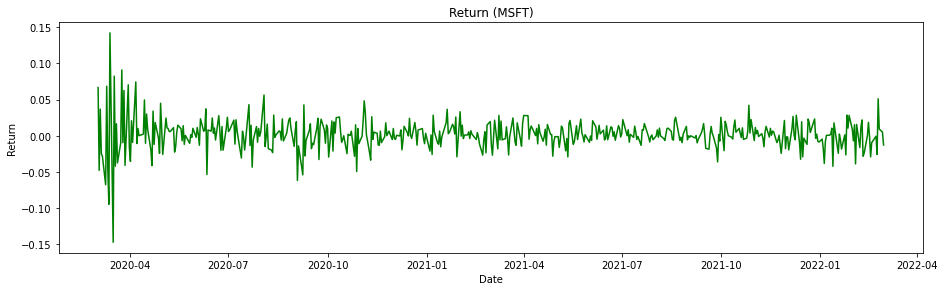

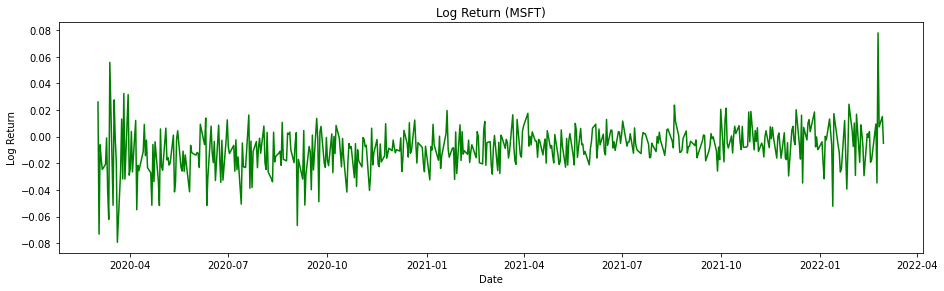

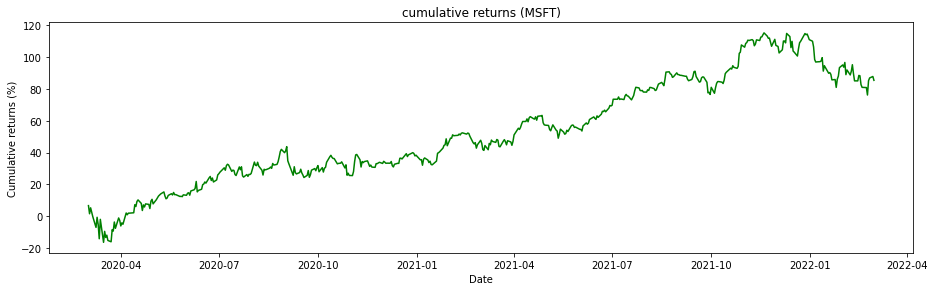

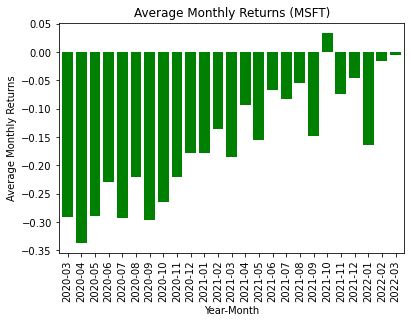

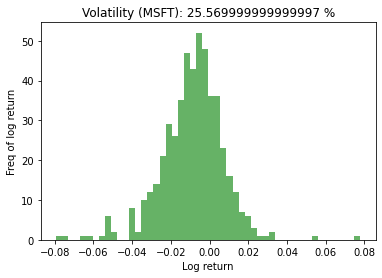

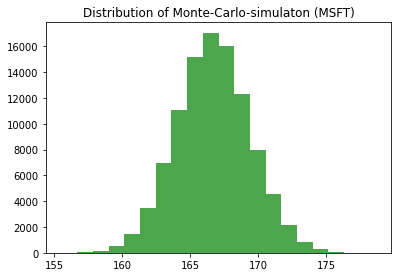

In [76]:
MSFT=analysis()
MSFT.data_extract("MSFT")
MSFT.visualize()

Average volume: 4350905603.960396
The portfolio beta is 1.0
The portfolio alpha is -0.0
Monte-Carlo Stimulation:
Start Price: $3090.23
Mean Final Price: $3091.40
VaR(0.99): $79.29
q(0.99): $3010.94


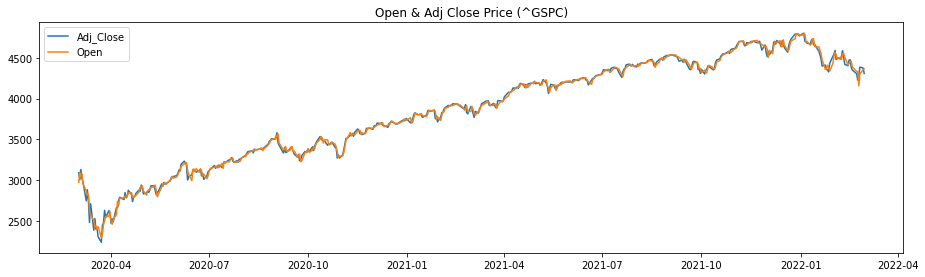

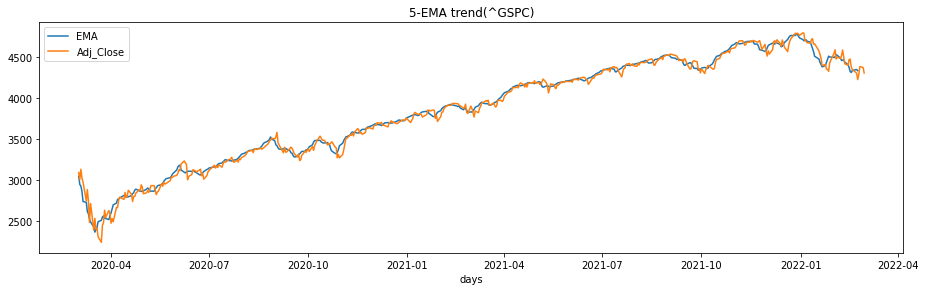

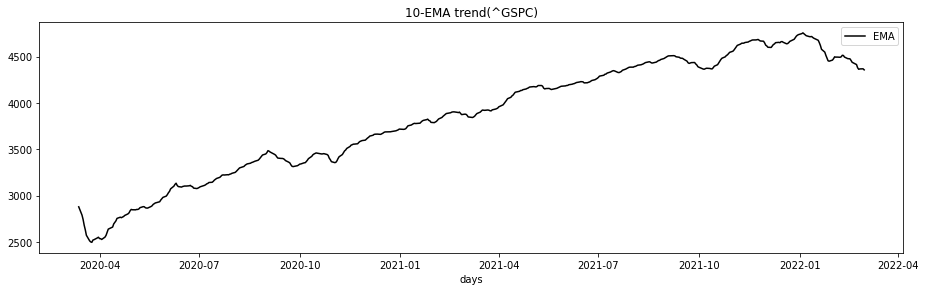

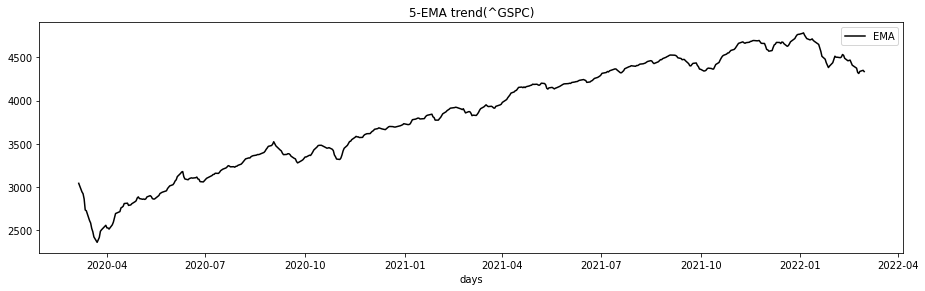

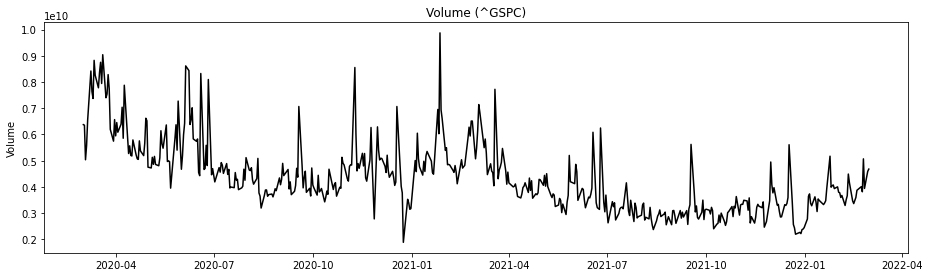

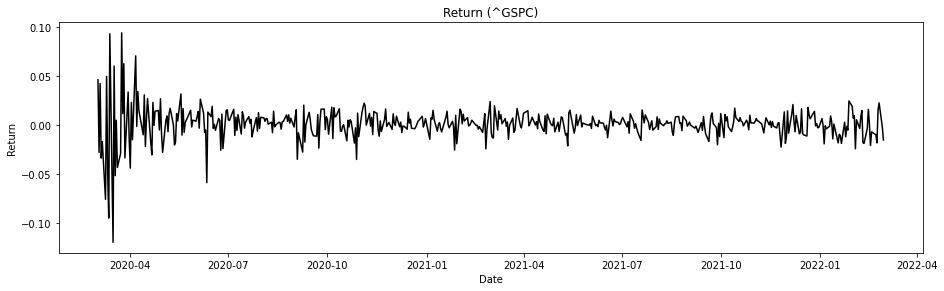

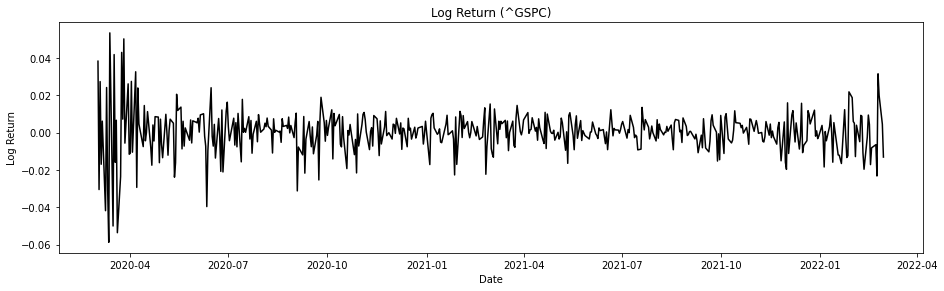

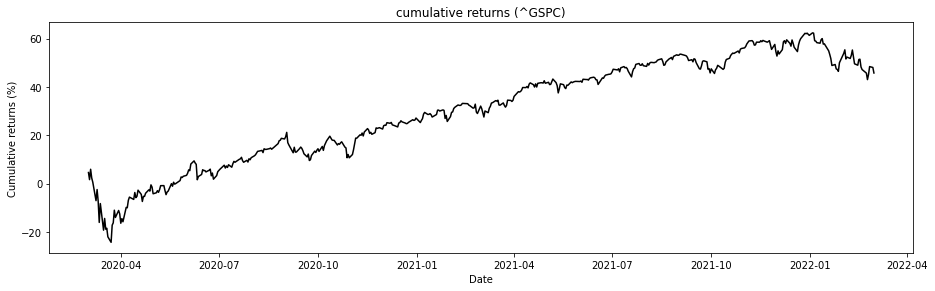

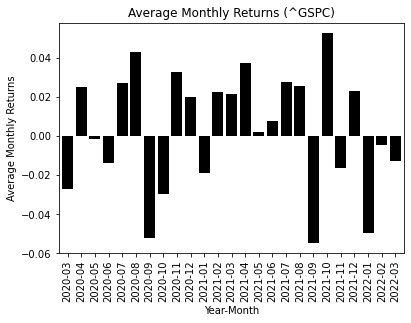

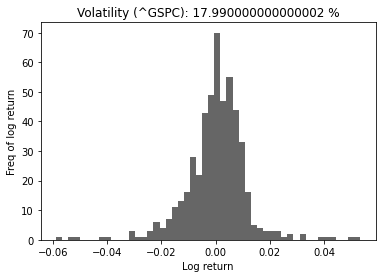

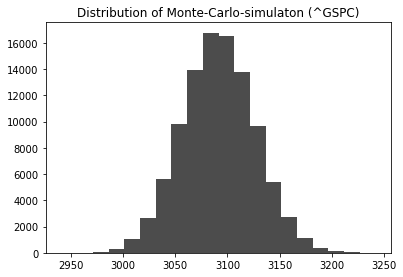

In [77]:
SNP_500=analysis()

SNP_500.data_extract("^GSPC")
SNP_500.visualize()

      var_5_quant  var_5_perc (%)  var_5_one_mil
GOOG       -0.024             2.4          24000
AAPL       -0.036             3.6          36000
AMZN       -0.028             2.8          28000
MSFT       -0.034             3.4          34000
SNP        -0.017             1.7          17000


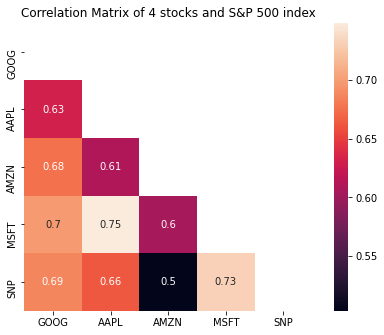

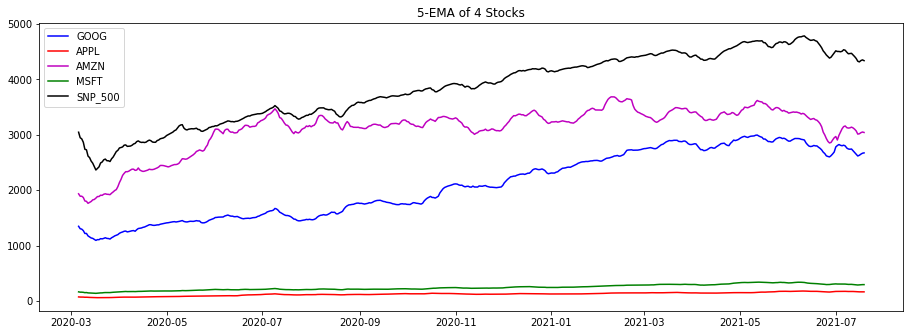

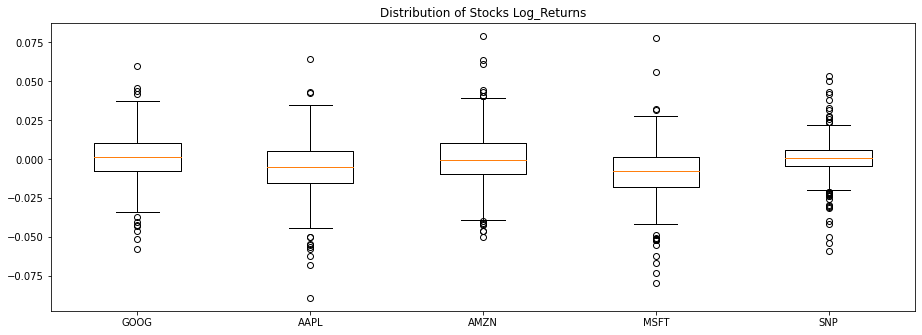

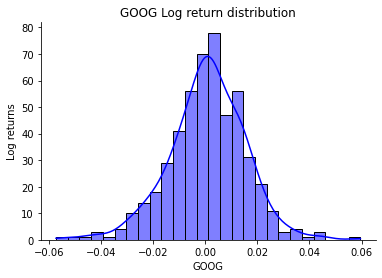

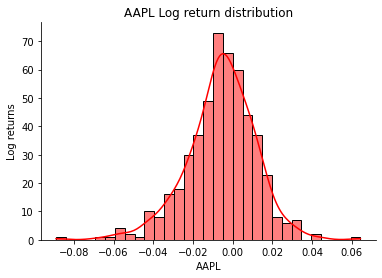

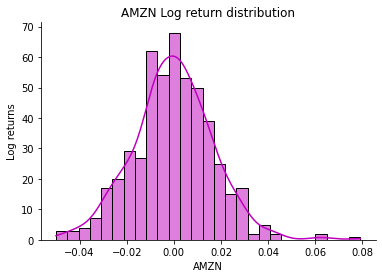

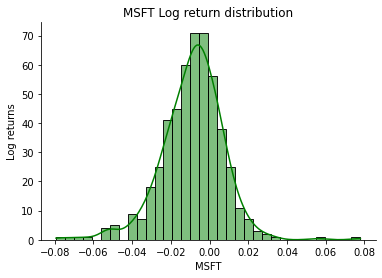

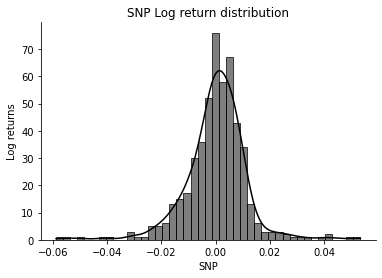

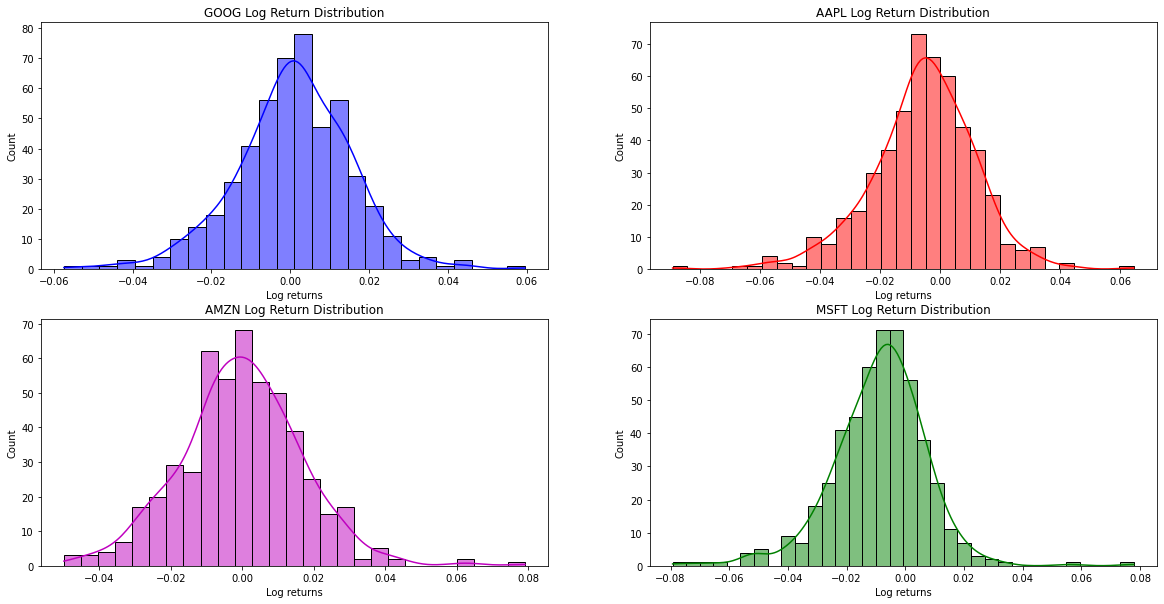

In [78]:
mix=mix()
mix.correlate()

In [79]:
mix.corr

,GOOG,AAPL,AMZN,MSFT,SNP
GOOG,1.000000,0.630780,0.675392,0.698671,0.686574
AAPL,0.630780,1.000000,0.610125,0.748671,0.663267
AMZN,0.675392,0.610125,1.000000,0.604335,0.503266
MSFT,0.698671,0.748671,0.604335,1.000000,0.731710
SNP,0.686574,0.663267,0.503266,0.731710,1.000000


### P/E Ratio(TTM)(Close price / Earning per share), Close price at 01/03/2022

GOOG: 23.9 from https://www.gurufocus.com/stock/GOOG/data/pe-ratio <br>
AAPL: 27.0 from https://www.gurufocus.com/stock/AAPL/data/pe-ratio <br>
AMZN: 46.7 from https://www.gurufocus.com/stock/amzn/data/pe-ratio <br>
MSFT: 31.4 from https://www.gurufocus.com/stock/MSFT/data/pe-ratio <br>
S&P 500 : 25.5 (monthly P.E)


The lower the P/E ratio a company has, the better an investment the metric is saying it is.
However, the above assumes a value mindset when looking at the market. If you instead prefer to invest in larger, less volatile company stocks, 
you may be willing to pay up for a pricier investment with a higher P/E ratio.
P/E ratio = how many dollar <br>

The price-to-earnings ratio (P/E) is one of the most widely used tools by which investors and analysts determine a stock's relative valuation. The P/E ratio helps one determine whether a stock is overvalued or undervalued. A company's P/E can also be benchmarked against other stocks in the same industry or against the broader market, such as the S&P 500 Index.


e.g. If a company was currently trading at a P/E multiple of 20x, the interpretation is that an investor is willing to pay 20 dollars for 1 dollar of current earnings.

In [15]:
print(skew(GOOG.stock.Log_returns),
skew(AAPL.stock.Log_returns),
skew(MSFT.stock.Log_returns),
skew(AMZN.stock.Log_returns))

#GOOG.stock.Log_returns.std()

-0.226836614322404 -0.4564736347170713 -0.26474121056456645 0.24814761928168935


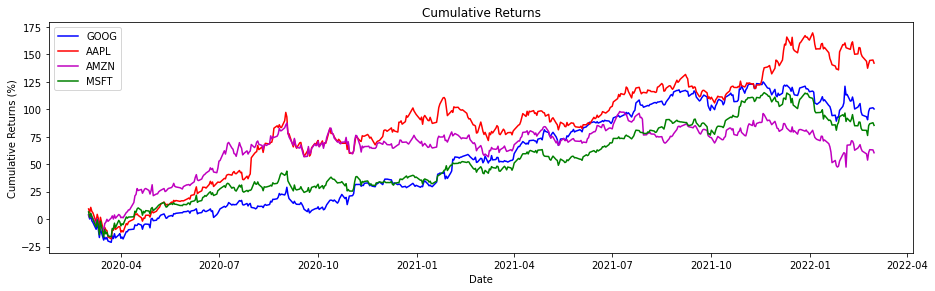

In [16]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,2,0.8])
ax.grid(False)
ax.plot(GOOG.stock.cum_returns*100, GOOG.color, label="GOOG")
ax.plot(AAPL.stock.cum_returns*100, AAPL.color,label="AAPL")
ax.plot(AMZN.stock.cum_returns*100, AMZN.color,label="AMZN")
ax.plot(MSFT.stock.cum_returns*100, MSFT.color,label="MSFT")
ax.set_title("Cumulative Returns")
ax.set_ylabel("Cumulative Returns (%)")
ax.set_xlabel("Date")
plt.legend()
plt.savefig("Cum_returns_comb.png", bbox_inches='tight')

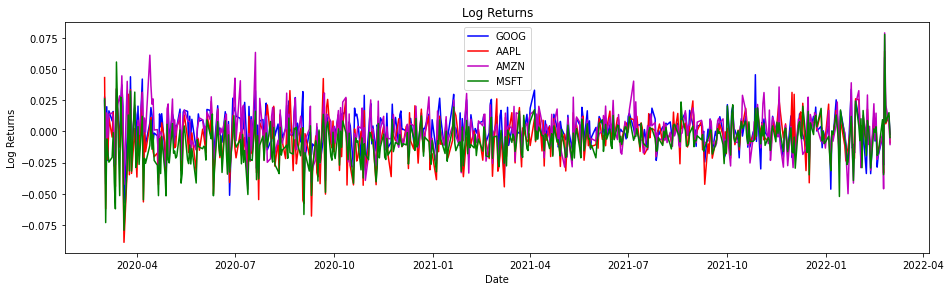

In [17]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,2,0.8])
ax.grid(False)
ax.plot(GOOG.stock.Log_returns, GOOG.color, label="GOOG")
ax.plot(AAPL.stock.Log_returns, AAPL.color,label="AAPL")
ax.plot(AMZN.stock.Log_returns, AMZN.color,label="AMZN")
ax.plot(MSFT.stock.Log_returns, MSFT.color,label="MSFT")
ax.set_title("Log Returns")
ax.set_ylabel("Log Returns")
ax.set_xlabel("Date")
ax.legend()
plt.savefig("Log_returns_comb.png", bbox_inches='tight')